In [1]:
import numpy as np
import matplotlib.pyplot as plt
import deepxde as dde
from deepxde.backend import tf

Using backend: paddle
Other supported backends: tensorflow.compat.v1, tensorflow, pytorch, jax.
paddle supports more examples now and is recommended.


In [2]:
L = 2

In [5]:
def wave_function(x, y, n1, n2, L):
    if -L/2 <= x <= L/2 and -L/2 <= y <= L/2:
        sin1 = np.sin(n1*np.pi*(x+L/2)/L)
        sin2 = np.sin(n2*np.pi*(y+L/2)/L)
        return 2/L* sin1*sin2
    return 0

def wave1(x, y):
    return wave_function(x, y, 1, 1, L)


def wave2(x, y):
    return wave_function(x, y, 1, 2, L)


def wave3(x, y):
    return wave_function(x, y, 2, 1, L)

def wave4(x, y):
    return wave_function(x, y, 2, 2, L)

In [6]:
def draw_function(function):
    x = np.linspace(-L / 2, L / 2, 100)
    y = np.linspace(-L / 2, L / 2, 100)
    X, Y = np.meshgrid(x, y)
    xy = np.vstack([X.flatten(), Y.flatten()]).T

    Z_true = np.array([function(xy[i, 0], xy[i, 1]) for i in range(xy.shape[0])]).reshape(X.shape)
    

    fig, ax = plt.subplots()
    c = ax.pcolormesh(X, Y, Z_true, cmap='viridis')
    fig.colorbar(c, ax=ax)
    plt.show()


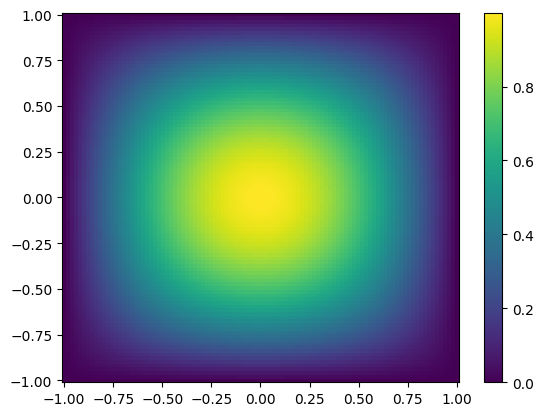

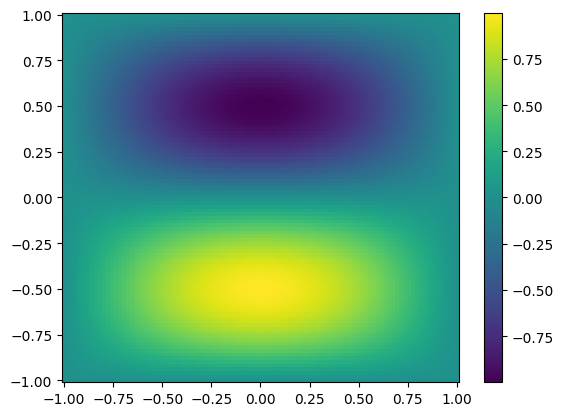

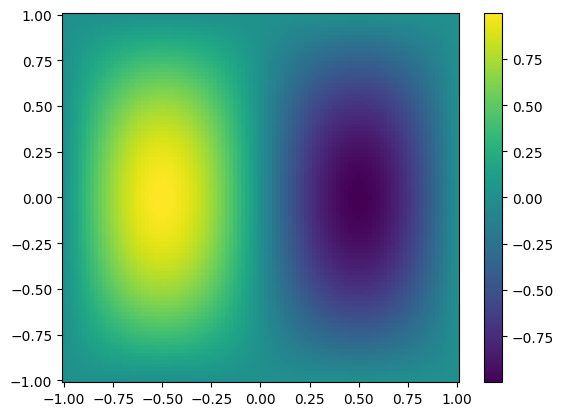

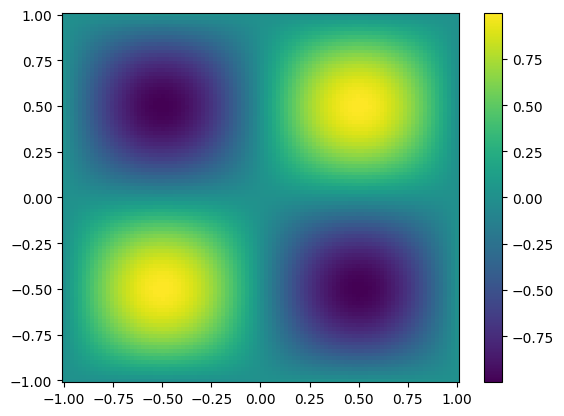

In [7]:
L = 2
draw_function(wave1)
draw_function(wave2)
draw_function(wave3)
draw_function(wave4)


In [8]:
L = 2.0
n1 = 1.0
n2 = 1.0
π = np.pi

In [27]:
def pde(x, psi, n1, n2):
    laplacian = dde.grad.hessian(psi, x, i=0, j=0) + dde.grad.hessian(psi, x, i=1, j=1)
    V = (n1**2 + n2**2) * np.pi**2 / (2 * L**2)
    return 1/2 * laplacian + V * psi


def pde1(x, psi): return pde(x, psi, 1, 1)
def pde2(x, psi): return pde(x, psi, 1, 2)
def pde3(x, psi): return pde(x, psi, 2, 1)
def pde4(x, psi): return pde(x, psi, 2, 2)

In [29]:
def solve(pde):
    geom = dde.geometry.Rectangle([-L / 2, -L / 2], [L / 2, L / 2])

    bc = dde.DirichletBC(geom, lambda _: 0, lambda x, on_boundary: on_boundary)

    data = dde.data.PDE(geom, pde, bc, num_domain=256, num_boundary=80, num_test=10000)

    net = dde.maps.FNN([2] + [20] * 3 + [1], "tanh", "Glorot normal")

    model = dde.Model(data, net)
    model.compile("adam", lr=0.001)

    losshistory, train_state = model.train(epochs=10000)

    return model

In [30]:
def draw_model( model ):
    x = np.linspace(-L / 2, L / 2, 100)
    y = np.linspace(-L / 2, L / 2, 100)
    X, Y = np.meshgrid(x, y)
    xy = np.vstack([X.flatten(), Y.flatten()]).T
    pred = model.predict(xy)
    Z = pred.reshape(X.shape)

    plt.figure(figsize=(8, 6))
    plt.pcolormesh(X, Y, Z, shading='auto')
    plt.colorbar()
    plt.show()


Compiling model...
'compile' took 0.000138 s

Training model...

Step      Train loss              Test loss               Test metric
0         [1.32e-03, 6.95e-04]    [1.14e-03, 6.95e-04]    []  
1000      [8.82e-07, 4.88e-08]    [7.20e-07, 4.88e-08]    []  
2000      [4.53e-07, 2.67e-08]    [3.74e-07, 2.67e-08]    []  
3000      [5.53e-07, 1.17e-07]    [4.30e-07, 1.17e-07]    []  
4000      [1.92e-07, 1.19e-08]    [1.50e-07, 1.19e-08]    []  
5000      [1.80e-06, 3.09e-07]    [1.76e-06, 3.09e-07]    []  
6000      [1.45e-07, 2.08e-08]    [1.18e-07, 2.08e-08]    []  
7000      [1.09e-07, 1.35e-08]    [9.32e-08, 1.35e-08]    []  
8000      [2.45e-07, 8.55e-08]    [1.76e-07, 8.55e-08]    []  
9000      [4.25e-06, 1.52e-06]    [3.29e-06, 1.52e-06]    []  
10000     [1.01e-07, 2.85e-08]    [8.25e-08, 2.85e-08]    []  

Best model at step 7000:
  train loss: 1.23e-07
  test loss: 1.07e-07
  test metric: []

'train' took 26.654255 s



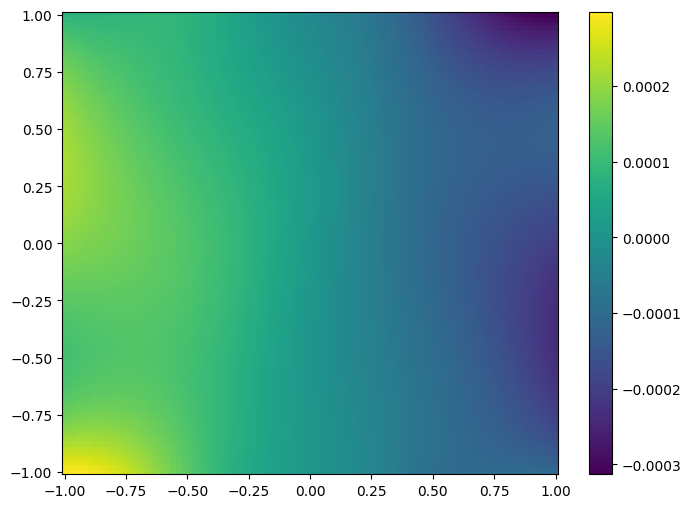

In [32]:
model1 = solve(pde1)
draw_model(model1)

In [150]:
model1 = solve(pde1)
model2 = solve(pde2)
model3 = solve(pde3)
model4 = solve(pde4)

Compiling model...
'compile' took 0.000162 s



Training model...

Step      Train loss              Test loss               Test metric
0         [1.02e+00, 4.37e-01]    [8.13e-01, 4.37e-01]    []  
1000      [4.36e-05, 8.53e-05]    [3.96e-05, 8.53e-05]    []  
2000      [3.17e-06, 4.20e-06]    [2.50e-06, 4.20e-06]    []  
3000      [7.36e-07, 8.36e-07]    [5.10e-07, 8.36e-07]    []  
4000      [6.03e-07, 7.32e-07]    [4.48e-07, 7.32e-07]    []  
5000      [5.08e-07, 6.41e-07]    [3.85e-07, 6.41e-07]    []  
6000      [4.55e-07, 5.94e-07]    [3.34e-07, 5.94e-07]    []  
7000      [3.66e-07, 4.96e-07]    [2.75e-07, 4.96e-07]    []  
8000      [9.33e-07, 5.79e-07]    [7.98e-07, 5.79e-07]    []  
9000      [7.80e-07, 5.59e-07]    [6.80e-07, 5.59e-07]    []  
10000     [4.21e-06, 1.04e-06]    [4.17e-06, 1.04e-06]    []  

Best model at step 7000:
  train loss: 8.62e-07
  test loss: 7.71e-07
  test metric: []

'train' took 26.839890 s

Compiling model...
'compile' took 0.000177 s

Training model...

Step      Train loss              Tes

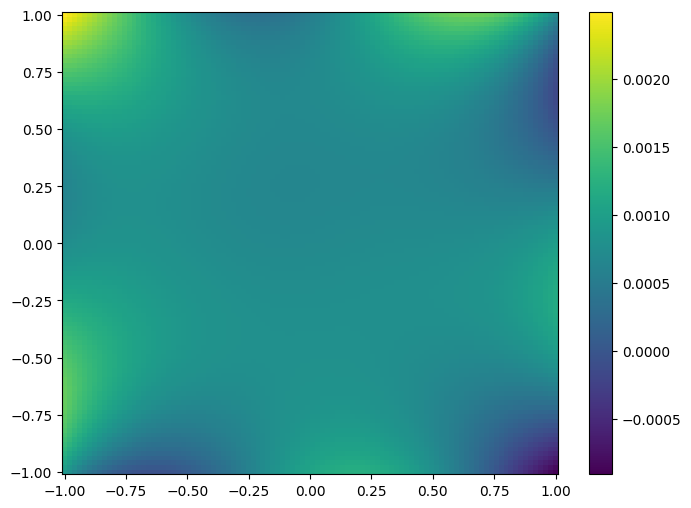

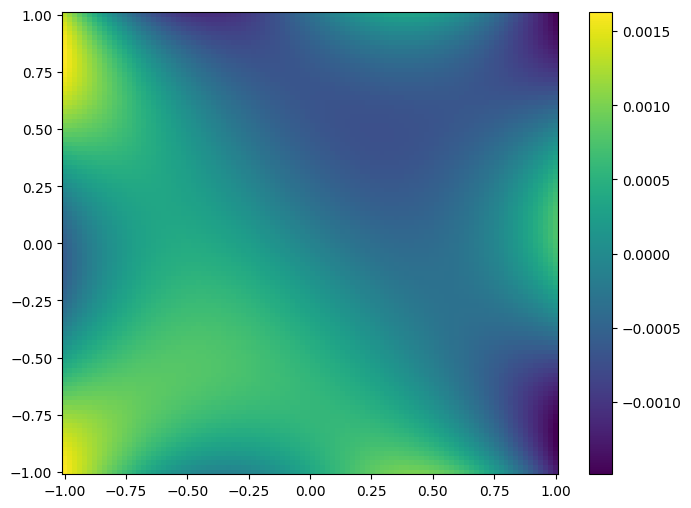

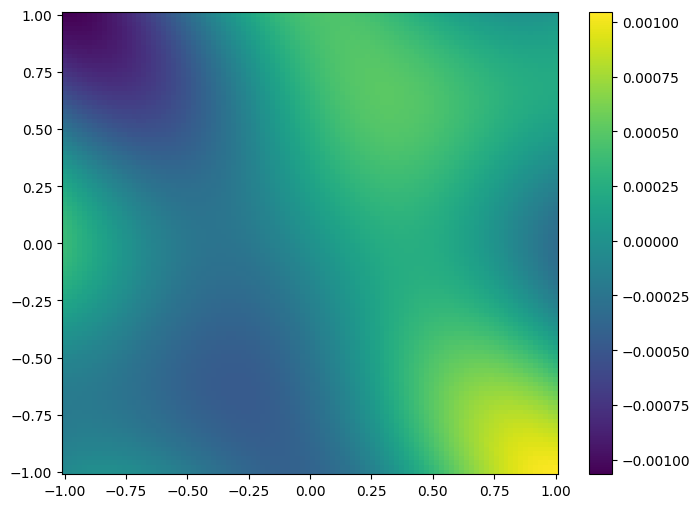

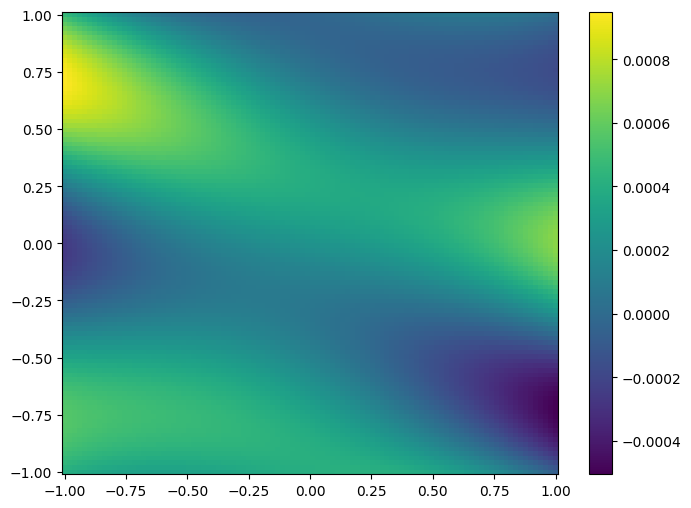

In [151]:
draw_model(model1)
draw_model(model2)
draw_model(model3)
draw_model(model4)

In [142]:
def draw_error(model, function):
    x = np.linspace(-L / 2+10e-8, L / 2-10e-8, 100)
    y = np.linspace(-L / 2+10e-8, L / 2-10e-8, 100)
    X, Y = np.meshgrid(x, y)
    xy = np.vstack([X.flatten(), Y.flatten()]).T

    Z_true = np.array([wave_function(xy[i, 0], xy[i, 1], n1, n2, L) for i in range(xy.shape[0])]).reshape(X.shape)
    
    Z_pred = model.predict(xy).reshape(X.shape)
    
    Z_error = np.abs((Z_true - Z_pred) / (Z_true+ 10e-12))

    fig, ax = plt.subplots()
    c = ax.pcolormesh(X, Y, Z_error, cmap='viridis')
    fig.colorbar(c, ax=ax)
    plt.show()

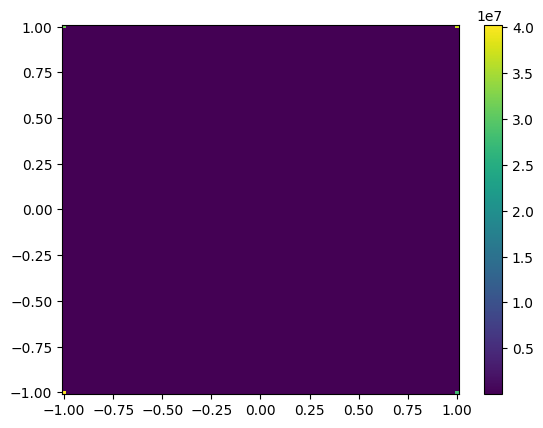

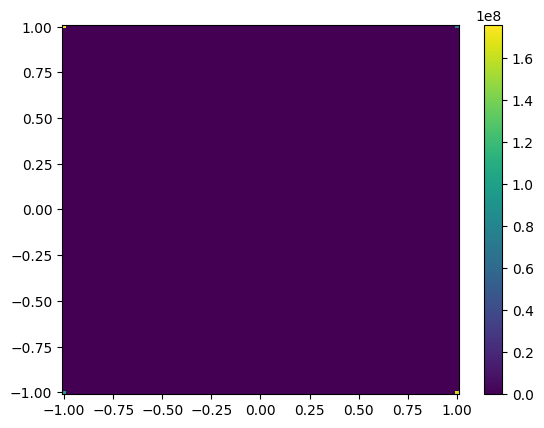

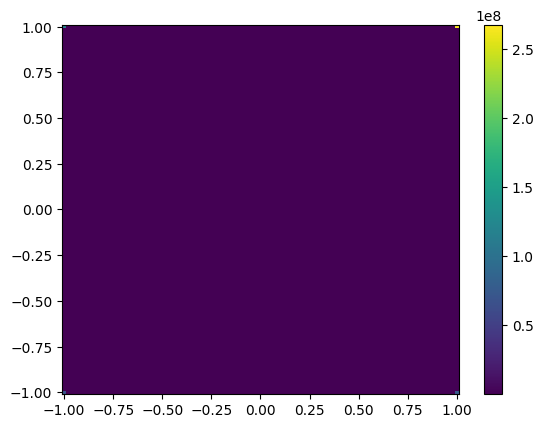

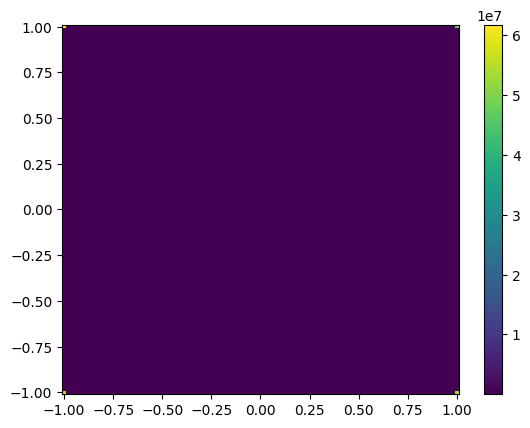

In [143]:
draw_error(model1, wave1)
draw_error(model2, wave2)
draw_error(model3, wave3)
draw_error(model4, wave4)

In [144]:
x = 0
y = 0
print(model1.predict(np.array([[x, y]])), wave1(x,y))

[[-4.191225e-05]] 1.0
